# Worldbank Health and Nutrition Analysis

### Introduction
In this write up wanted to show off how organize and manipulate data in pandas. As you will see properly doing this makes analysis quite easy.

### The Data
I got the data from here: http://data.worldbank.org/data-catalog/ (here exactly: http://data.worldbank.org/data-catalog/health-nutrition-and-population-statistics).

In [2]:
import pandas as pd
%matplotlib inline

In [9]:
df = pd.read_csv('HNP_Data.csv', index_col=False)

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,47.550194
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like the rows are indicator values for a specific country across many years. In this format there is really not much we can do with the data.

### Restructuring to make a time series plot for an indicator and coury of interest.

To accomplish this we would need a dataframe with row index being years and the columns countries. But how do we deal with the fact that we have a large number of indicators? Do we make one dataframe for each indicator? No, what we should do is use Multi Indexed column names. Check it out.

In [11]:
df = df.drop(['Country Code', 'Indicator Code'], axis=1).\
set_index(['Indicator Name','Country Name']).sort_index().T

Now we can access an indicator just like a column. but instead of returning a pandas series object a pandas dataframe is returned. That is the magic of Multi Indexing. (you can also check out the docs at: http://pandas.pydata.org/pandas-docs/stable/advanced.html)


In [35]:
df['Mortality rate, under-5 (per 1,000)'].head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,246.3,NaN,NaN,NaN,NaN,249.360225,NaN,NaN,...,NaN,155.2,81.1,NaN,NaN,NaN,182.7,NaN,207.3,150.7
1961,356.5,NaN,246.1,NaN,NaN,NaN,NaN,241.992944,NaN,NaN,...,NaN,151.0,78.3,NaN,NaN,NaN,180.4,NaN,203.0,146.1
1962,350.6,NaN,246.2,NaN,NaN,NaN,NaN,236.496536,NaN,NaN,...,NaN,147.0,75.9,NaN,NaN,NaN,177.1,NaN,199.0,141.6
1963,345.0,NaN,246.8,NaN,NaN,NaN,NaN,241.306521,NaN,NaN,...,NaN,142.4,73.8,NaN,NaN,NaN,174.1,406.1,195.4,137.2
1964,339.7,NaN,247.4,NaN,NaN,NaN,NaN,234.443051,NaN,NaN,...,NaN,137.7,72.0,95.0,NaN,NaN,175.2,397.7,192.3,132.8


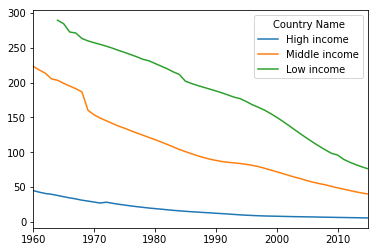

In [29]:
df['Mortality rate, under-5 (per 1,000)'][['High income', 'Middle income', 'Low income']].plot()

Nice! It looks like High, Middle and Low income countries are converging on under-5 mortality rate.

### Restructuring to make a box plot over time comparing two indicators.

The indicators that we are interested in here are: Mortality rate, under-5, male (per 1,000) and Mortality rate, under-5, female (per 1,000). We're going to make a boxplot of all of the countries for all of the available years.


In [38]:
df['Mortality rate, under-5, male (per 1,000)'].dropna(axis=[0,1], how='all')

Country Name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
1990,185.5,44.5,50.8,9.4,236.3,28.2,83.418292,30.5,54.6,10.2,...,25.5,79.5,38.5,32.9,56.5,47.0,92.9,131.7,199.3,82.0
2000,141.1,28.8,42.5,5.0,226.7,17.1,63.832238,22.3,33.3,6.9,...,18.7,70.7,30.8,24.1,38.1,32.0,77.8,99.9,171.8,113.0
2010,108.4,18.3,28.8,3.6,190.9,10.9,45.805552,16.0,20.0,5.3,...,13.5,51.8,30.8,18.5,28.2,25.7,53.3,58.1,87.8,95.7
2015,94.6,15.3,26.8,3.1,164.6,8.8,39.345160,13.7,15.6,4.1,...,11.1,44.1,29.8,16.6,24.6,22.9,44.4,45.5,68.9,76.1


In [37]:
df['Mortality rate, under-5, female (per 1,000)'].dropna(axis=[0,1], how='all')

Country Name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
1990,176.2,36.5,42.7,7.6,215.2,22.7,76.439642,24.5,44.8,8.0,...,20.5,63.0,32.6,26.1,44.7,41.6,88.2,120.7,181.6,69.2
2000,132.7,23.4,36.7,4.2,206.2,13.7,56.807549,18.0,26.8,5.6,...,14.9,55.5,25.9,19.0,29.2,27.4,73.8,90.6,154.0,98.4
2010,101.4,14.8,25.8,3.0,173.2,8.9,40.064303,13.1,16.0,4.3,...,11.1,40.0,26.1,14.6,21.3,21.7,49.7,50.2,76.2,83.0
2015,87.4,12.5,24.0,2.6,148.9,7.3,34.137936,11.3,12.5,3.4,...,9.1,33.9,25.2,13.2,18.7,19.3,40.5,38.3,58.9,64.9


So there are only 4 unique years for which we can make this comparison.


Now for the boxplot we are not interested in the name of the country we want all of the data. But we are interested in the year and the gender both of which are not columns. We can make year and gender a column with

In [44]:
male = df['Mortality rate, under-5, male (per 1,000)']\
.dropna(axis=[0,1], how='all').reset_index()
male['gender'] = 'male'
male.head()

Country Name,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe,gender
0,1990,185.5,44.5,50.8,9.4,236.3,28.2,83.418292,30.5,54.6,...,79.5,38.5,32.9,56.5,47.0,92.9,131.7,199.3,82.0,male
1,2000,141.1,28.8,42.5,5.0,226.7,17.1,63.832238,22.3,33.3,...,70.7,30.8,24.1,38.1,32.0,77.8,99.9,171.8,113.0,male
2,2010,108.4,18.3,28.8,3.6,190.9,10.9,45.805552,16.0,20.0,...,51.8,30.8,18.5,28.2,25.7,53.3,58.1,87.8,95.7,male
3,2015,94.6,15.3,26.8,3.1,164.6,8.8,39.345160,13.7,15.6,...,44.1,29.8,16.6,24.6,22.9,44.4,45.5,68.9,76.1,male


In [45]:
female = df['Mortality rate, under-5, female (per 1,000)']\
.dropna(axis=[0,1], how='all').reset_index()
female['gender'] = 'female'
female.head()

Country Name,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe,gender
0,1990,176.2,36.5,42.7,7.6,215.2,22.7,76.439642,24.5,44.8,...,63.0,32.6,26.1,44.7,41.6,88.2,120.7,181.6,69.2,female
1,2000,132.7,23.4,36.7,4.2,206.2,13.7,56.807549,18.0,26.8,...,55.5,25.9,19.0,29.2,27.4,73.8,90.6,154.0,98.4,female
2,2010,101.4,14.8,25.8,3.0,173.2,8.9,40.064303,13.1,16.0,...,40.0,26.1,14.6,21.3,21.7,49.7,50.2,76.2,83.0,female
3,2015,87.4,12.5,24.0,2.6,148.9,7.3,34.137936,11.3,12.5,...,33.9,25.2,13.2,18.7,19.3,40.5,38.3,58.9,64.9,female


We're making progress but what we really want is a dataframe that is just 3 columns (year, value, gender) not 236 as it is currently. We're going to accomplish this by using the magic of pandas melt function.

In [46]:
male = pd.melt(male, id_vars=['index', 'gender'])\
.drop('Country Name',axis=1)
male.head()

In [47]:
female = pd.melt(female, id_vars=['index', 'gender'])\
.drop('Country Name',axis=1)
female.head()

Ok now we can stack these two dataframes on top of each other to make the final plot.

In [51]:
male_and_female_data=pd.concat([male,female])

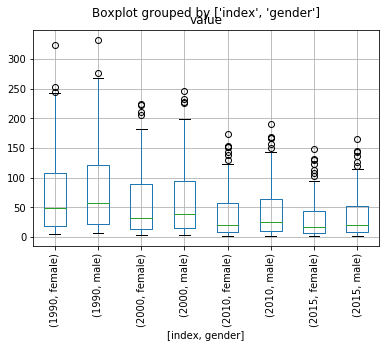

In [52]:
male_and_female_data.boxplot(by=['index', 'gender'], column='value',rot=90)

Nice we see that the under5 mortality is decreasing and that the gender difference is shreking (with males consistently higher).

### Conclusion

As you can see manipulating a Pandas Dataframe is key to going any sort of analysis with pandas. I hope that this write up was helpful and that you can make use of this in your own projects.

Peace&Love from Topnaga, California